In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
housing_data = pd.read_csv('datasets/housing.csv')
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7186,-118.18,34.03,39.0,609.0,145.0,690.0,134.0,2.9167,145800.0,<1H OCEAN
4930,-118.25,33.99,42.0,2261.0,574.0,2496.0,527.0,1.5556,98500.0,<1H OCEAN
2746,-115.57,32.78,29.0,2321.0,367.0,1173.0,360.0,4.0375,86400.0,INLAND
16216,-121.32,37.95,36.0,747.0,189.0,338.0,145.0,1.7885,62100.0,INLAND
13659,-117.28,34.06,2.0,1658.0,290.0,868.0,304.0,5.1365,136700.0,INLAND


In [38]:
housing_data = housing_data.dropna()
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [39]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [40]:
housing_data.shape

(19475, 10)

In [41]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [42]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [43]:
housing_data.shape

(19475, 14)

In [44]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
9166,-118.43,34.43,5.0,21113.0,4386.0,9842.0,3886.0,4.2037,194600.0,1,0,0,0,0
18111,-122.03,37.30,30.0,3007.0,554.0,1551.0,616.0,5.8521,326300.0,1,0,0,0,0
18512,-122.01,36.99,41.0,2548.0,508.0,1290.0,488.0,3.6902,233000.0,0,0,0,0,1
7546,-118.20,33.92,36.0,414.0,104.0,477.0,130.0,3.6719,130400.0,1,0,0,0,0
14847,-117.08,32.68,26.0,3071.0,615.0,2156.0,568.0,2.9318,112400.0,0,0,0,0,1


In [45]:
X = housing_data.drop(['median_house_value'],axis=1)
Y = housing_data['median_house_value']

In [28]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [49]:
print("Training score: ", linear_model.score(x_train, y_train))

Training score:  0.617925277047392


In [50]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [52]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
coef

ocean_proximity_INLAND        -25305.951596
longitude                     -24596.157059
latitude                      -22987.390268
population                       -34.647427
total_rooms                       -6.597176
households                        59.416981
total_bedrooms                    84.548102
housing_median_age               931.686237
ocean_proximity_NEAR BAY        6103.858452
ocean_proximity_<1H OCEAN      12953.553980
ocean_proximity_NEAR OCEAN     16718.688345
median_income                  38424.531139
ocean_proximity_ISLAND        152983.696982
dtype: float64

In [53]:
y_pred = linear_model.predict(x_test)

In [54]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
5890,226025.604845,450000.0
11288,261219.145855,215700.0
9405,374539.361863,400000.0
7641,249971.993450,212400.0
15511,230963.909690,147500.0
2993,139745.399722,109800.0
12380,174261.142139,122500.0
15392,162377.882172,250000.0
14636,223372.898226,166300.0
13200,86483.618754,150000.0


In [55]:
from sklearn.metrics import r2_score
print("testing score: ", r2_score(y_test, y_pred))

testing score:  0.5902776851862563


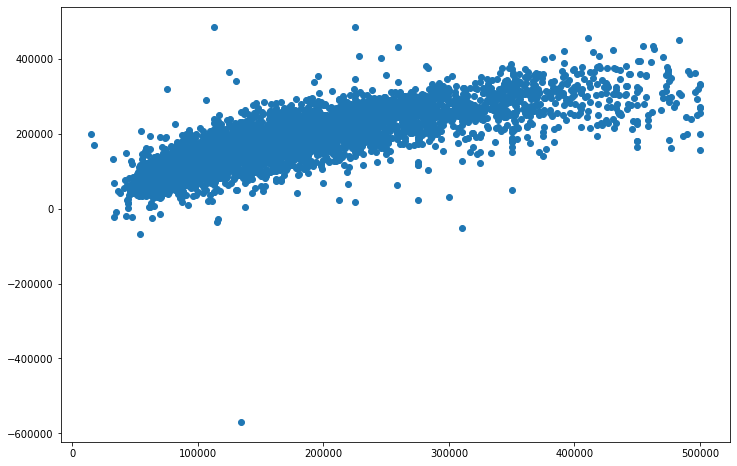

In [56]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.show()


In [57]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [58]:
df_pred_actual_sample.head()

,index,predicted,actual
0,18125,365768.813315,412300.0
1,6996,212953.629899,173200.0
2,17749,224264.590255,165000.0
3,2507,93928.102836,71900.0
4,16418,128402.213802,104000.0


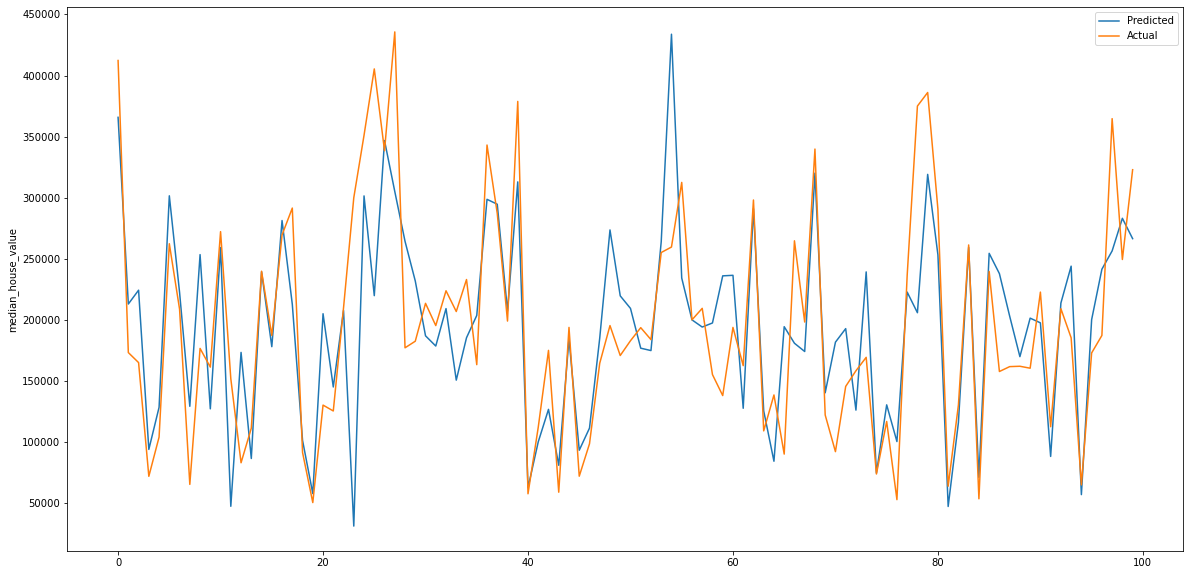

In [59]:
plt.figure(figsize = (20,10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()